In [1]:
import matplotlib.pyplot as plt
import pandas as pd


db = pd.read_csv('world_population.csv')

db.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
one_row = db.iloc[:, lambda df: [5,6,7,8,9,10,11,12]]
print(one_row)


     2022 Population  2020 Population  2015 Population  2010 Population  \
0           41128771         38972230         33753499         28189672   
1            2842321          2866849          2882481          2913399   
2           44903225         43451666         39543154         35856344   
3              44273            46189            51368            54849   
4              79824            77700            71746            71519   
..               ...              ...              ...              ...   
229            11572            11655            12182            13142   
230           575986           556048           491824           413296   
231         33696614         32284046         28516545         24743946   
232         20017675         18927715         16248230         13792086   
233         16320537         15669666         14154937         12839771   

     2000 Population  1990 Population  1980 Population  1970 Population  
0           19542982     

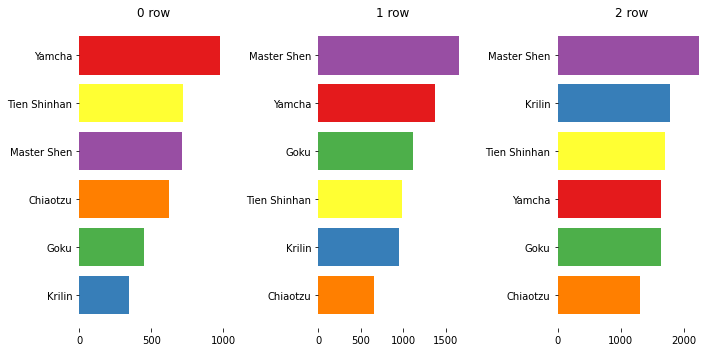

In [4]:
num = 3
fig, axs = plt.subplots(nrows = 1, ncols = num, figsize = (10, 5), tight_layout = True)
for i, ax in enumerate(axs):
    ax.barh(y=db.iloc[i].rank(),
            tick_label = db.iloc[i].index,
            width = db.iloc[i].values,
            color = plt.cm.Set1(range(6)))
    ax.set_title(f'{i} row', fontsize='larger')
    [spine.set_visible(False) for spine in ax.spines.values()]  # remove chart outlines

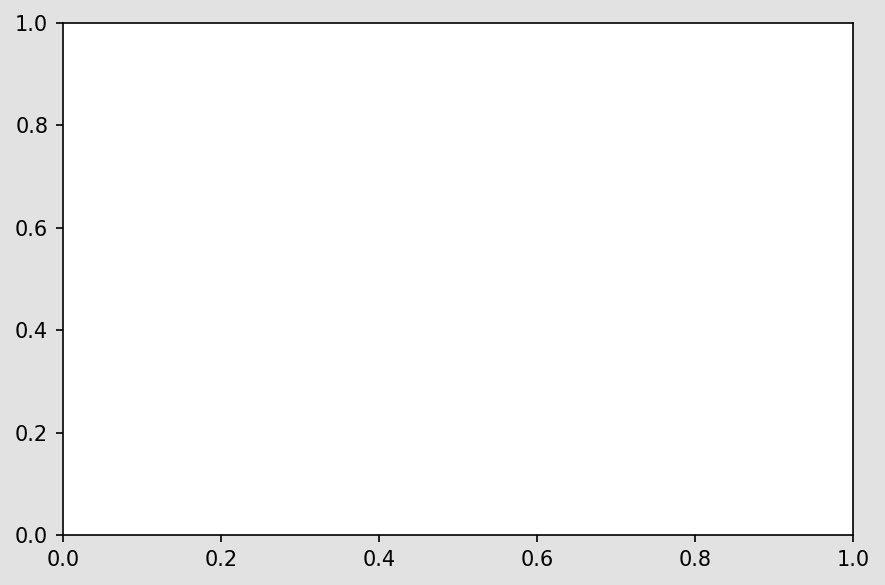

In [5]:
from matplotlib.animation import FuncAnimation

def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Greys(0.2))
    [spine.set_visible(False) for spine in ax.spines.values()]
    hbars = ax.barh(y = db.iloc[i].rank().values,
           tick_label=db.iloc[i].index,
           width = db.iloc[i].values,
           height = 0.8,
           color = plt.cm.Set1(range(11))
           )
    ax.set_title(f'Frame: {i}')
    #ax.bar_label(hbars, fmt='%.2d')
    

fig,ax = plt.subplots(#figsize=(10,7),
                      facecolor = plt.cm.Greys(0.2),
                      dpi = 150,
                      tight_layout=True
                     )

data_anime = FuncAnimation(
    fig = fig,
    func = update,
    frames= len(db),
    interval=300
)

In [10]:
import numpy as np

db.index = range(0,21*10,10)
#pritn(list(db.index))
#[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

row_nums = [i for i in range(0,210) if i % 10 != 0 ]
empty = pd.DataFrame(np.nan, index= row_nums, columns = db.columns)

expand_df = pd.concat([db, empty]).sort_index()
expand_df

,Yamcha,Krilin,Goku,Master Shen,Chiaotzu,Tien Shinhan
0,978.0,347.0,446.0,715.0,621.0,723.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
205,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,NaN,NaN,NaN,NaN
207,NaN,NaN,NaN,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
rank_df = expand_df.rank(axis=1)
rank_df.head(11)

,Yamcha,Krilin,Goku,Master Shen,Chiaotzu,Tien Shinhan
0,6.0,1.0,2.0,4.0,3.0,5.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
expand_df = expand_df.interpolate()
expand_df.head(11)

,Yamcha,Krilin,Goku,Master Shen,Chiaotzu,Tien Shinhan
0,978.0,347.0,446.0,715.0,621.0,723.0
1,1017.7,407.7,513.2,809.4,624.5,749.5
2,1057.4,468.4,580.4,903.8,628.0,776.0
3,1097.1,529.1,647.6,998.2,631.5,802.5
4,1136.8,589.8,714.8,1092.6,635.0,829.0
5,1176.5,650.5,782.0,1187.0,638.5,855.5
6,1216.2,711.2,849.2,1281.4,642.0,882.0
7,1255.9,771.9,916.4,1375.8,645.5,908.5
8,1295.6,832.6,983.6,1470.2,649.0,935.0
9,1335.3,893.3,1050.8,1564.6,652.5,961.5


In [13]:
rank_df = rank_df.interpolate()
rank_df.head(11)

,Yamcha,Krilin,Goku,Master Shen,Chiaotzu,Tien Shinhan
0,6.0,1.0,2.0,4.0,3.0,5.0
1,5.9,1.1,2.2,4.2,2.8,4.8
2,5.8,1.2,2.4,4.4,2.6,4.6
3,5.7,1.3,2.6,4.6,2.4,4.4
4,5.6,1.4,2.8,4.8,2.2,4.2
5,5.5,1.5,3.0,5.0,2.0,4.0
6,5.4,1.6,3.2,5.2,1.8,3.8
7,5.3,1.7,3.4,5.4,1.6,3.6
8,5.2,1.8,3.6,5.6,1.4,3.4
9,5.1,1.9,3.8,5.8,1.2,3.2


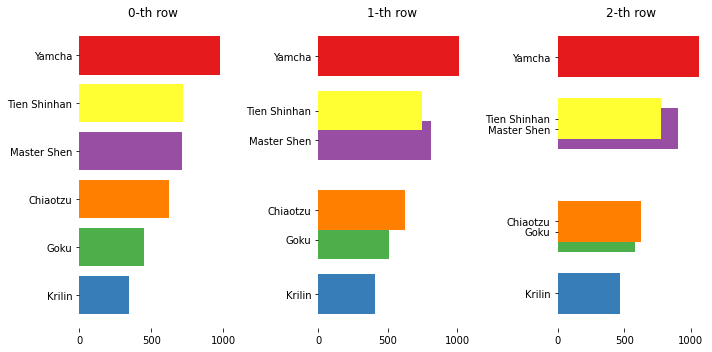

In [14]:
num = 3
fig, axs = plt.subplots(nrows = 1, ncols = num, figsize = (10, 5), tight_layout = True)
for i, ax in enumerate(axs):
    ax.barh(y=rank_df.iloc[i].values,
            tick_label = expand_df.iloc[i].index,
            width = expand_df.iloc[i].values,
            color = plt.cm.Set1(range(6)))
    ax.set_title(f'{i}-th row', fontsize='larger')
    [spine.set_visible(False) for spine in ax.spines.values()]  # remove chart outlines

MovieWriter ffmpeg unavailable; using Pillow instead.


KeyError: 'MPEG'

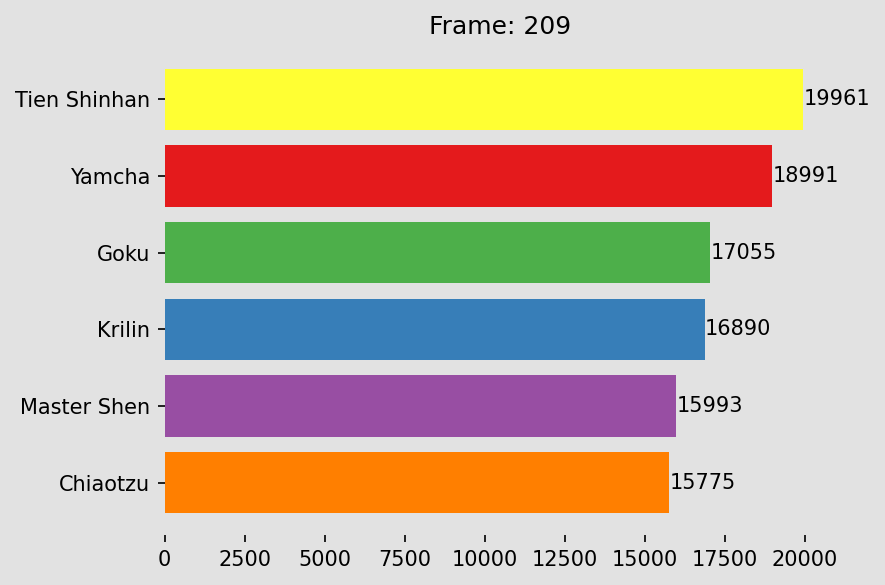

In [18]:
def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Greys(0.2))
    [spine.set_visible(False) for spine in ax.spines.values()]
    hbars = ax.barh(y = rank_df.iloc[i].values,
           tick_label=expand_df.iloc[i].index,
           width = expand_df.iloc[i].values,
           height = 0.8,
           color = plt.cm.Set1(range(11))
           )
    ax.set_title(f'Frame: {i}')
    ax.bar_label(hbars, fmt='%.2d')
    

fig,ax = plt.subplots(#figsize=(10,7),
                      facecolor = plt.cm.Greys(0.2),
                      dpi = 150,
                      tight_layout=True
                     )


data_anime = FuncAnimation(
    fig = fig,
    func = update,
    frames= len(expand_df),
    interval=100
)
data_anime.save('DrgBl.mpeg')